In [1]:
import pandas as pd

# **Chargement des données**

In [2]:
data = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')

In [3]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
data.shape

(42656, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


# **Nettoyage et analyse exploratoire de données**

In [6]:
data.isna().sum()

,0
Review_ID,0
Rating,0
Year_Month,0
Reviewer_Location,0
Review_Text,0
Branch,0


In [7]:
data.duplicated().sum()

12

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.Rating.value_counts()

,count
Rating,
5,23140
4,10771
3,5107
2,2127
1,1499


In [11]:
data["Rating"].value_counts()

,count
Rating,
5,23140
4,10771
3,5107
2,2127
1,1499


<Axes: >

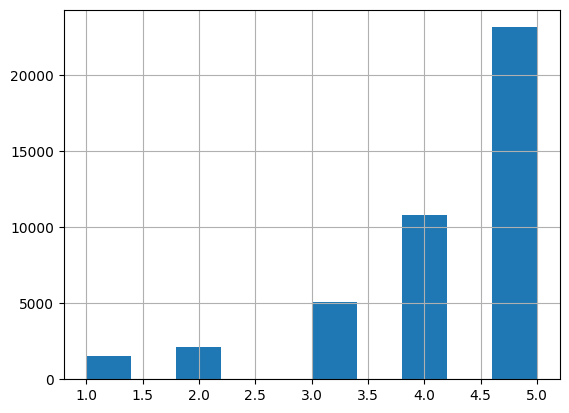

In [12]:
data.Rating.hist()

<Axes: >

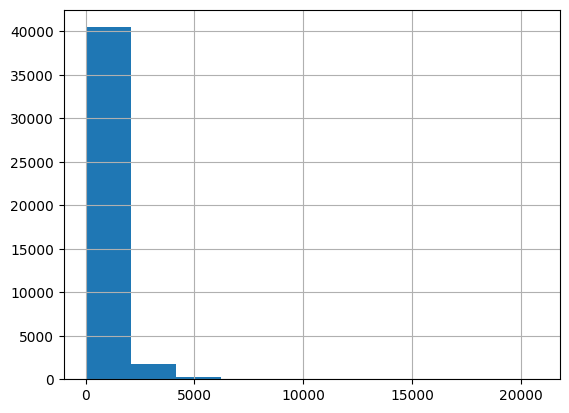

In [13]:
data.Review_Text.apply(len).hist()

<Axes: >

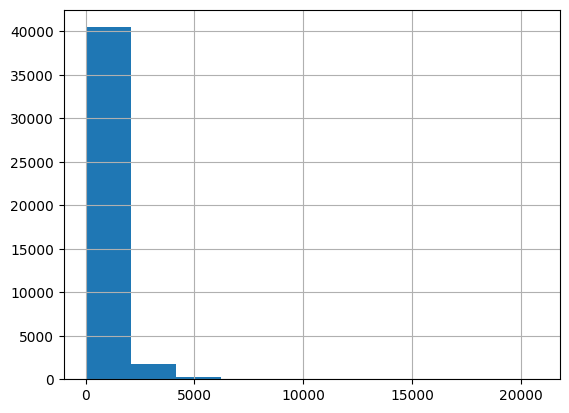

In [14]:
data.Review_Text.str.len().hist()

In [15]:
data.Review_Text.str.len().describe()

,Review_Text
count,42644.000000
mean,696.946487
std,831.468266
min,18.000000
25%,239.000000
50%,435.000000
75%,838.000000
max,20756.000000


<Axes: >

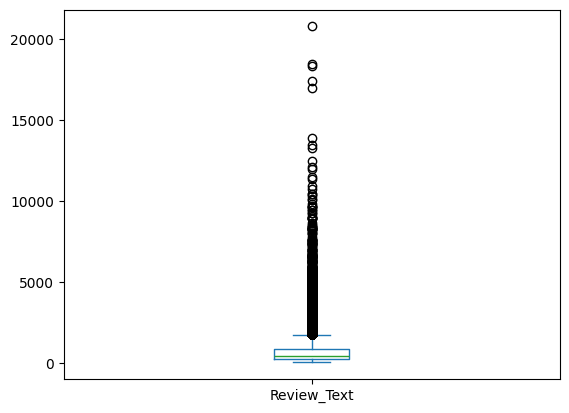

In [16]:
data.Review_Text.str.len().plot.box()

<Axes: >

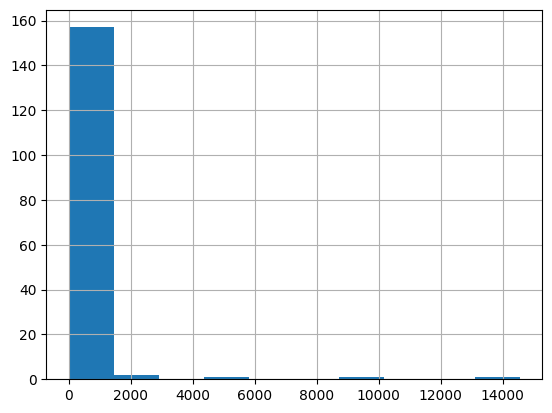

In [17]:
data.Reviewer_Location.value_counts().hist()

<Axes: xlabel='Reviewer_Location'>

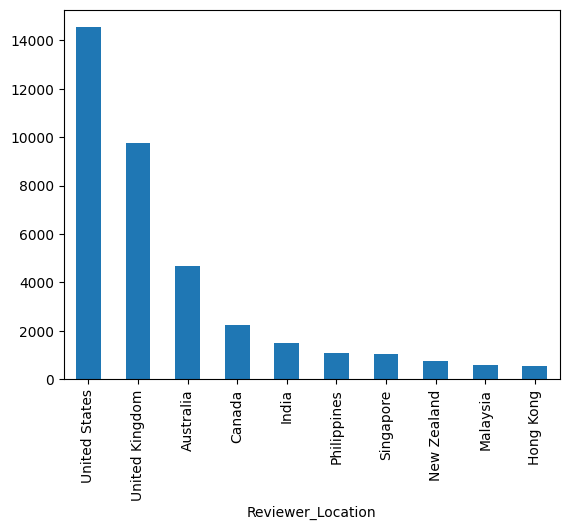

In [18]:
data.Reviewer_Location.value_counts()[:10].plot.bar()

In [19]:
data[['Branch', 'Rating']].value_counts().reset_index().sort_values(by='Rating', ascending=False).set_index(['Rating', 'Branch'])

count
Rating Branch                      
5      Disneyland_California  12517
       Disneyland_Paris        6110
       Disneyland_HongKong     4513
4      Disneyland_California   3980
       Disneyland_Paris        3564
       Disneyland_HongKong     3227
3      Disneyland_Paris        2083
       Disneyland_California   1661
       Disneyland_HongKong     1363
2      Disneyland_Paris        1044
       Disneyland_California    747
       Disneyland_HongKong      336
1      Disneyland_Paris         828
       Disneyland_California    499
       Disneyland_HongKong      172

<Axes: xlabel='Rating,Branch'>

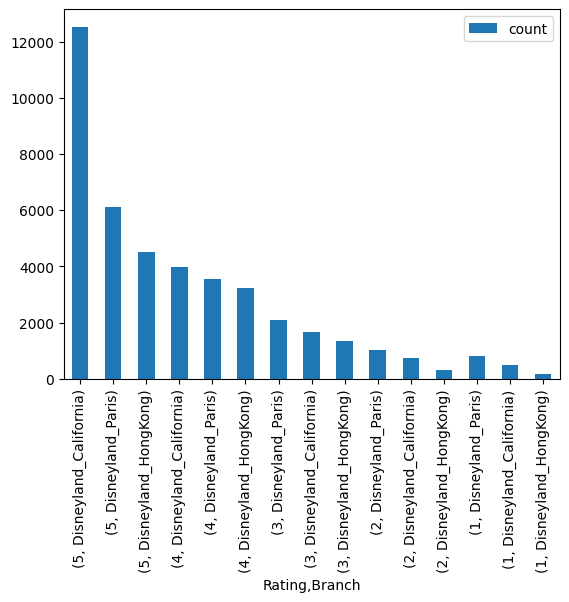

In [20]:
data[['Branch', 'Rating']].value_counts().reset_index().sort_values(by='Rating', ascending=False).set_index(['Rating', 'Branch']).plot.bar()

<Axes: xlabel='Rating'>

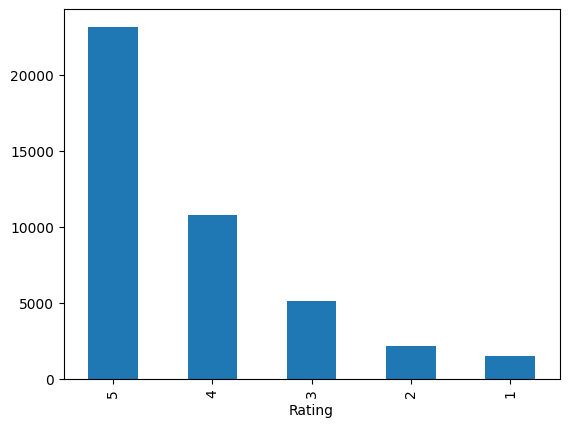

In [21]:
data.Rating.value_counts().plot.bar()

In [22]:
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [23]:
data["Year"] = data.Year_Month.apply(lambda x: x.split('-')[0])
data["Month"] = data.Year_Month.apply(lambda x: x.split('-')[-1])

In [24]:
data["Year"].unique()

array(['2019', '2018', 'missing', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010'], dtype=object)

In [25]:
data["Month"].unique()

array(['4', '5', '3', '9', '1', '11', '12', '6', '2', '10', '8', '7',
       'missing'], dtype=object)

In [26]:
data.groupby(['Branch', 'Month'])['Rating'].agg('mean').sort_values(ascending=False)

Branch                 Month  
Disneyland_California  9          4.529338
                       11         4.494487
                       8          4.470379
                       7          4.433460
                       6          4.431956
                       4          4.392713
                       5          4.392082
                       1          4.386880
                       2          4.368564
                       12         4.359450
                       10         4.351914
                       3          4.347796
Disneyland_HongKong    3          4.282895
Disneyland_California  missing    4.279070
Disneyland_HongKong    5          4.271669
                       12         4.263436
                       6          4.260925
                       10         4.252619
                       9          4.248062
                       1          4.244624
                       11         4.237674
                       4          4.237368
Disneyland_Paris       9          4.163951
                       1          4.161235
Disneyland_HongKong    2          4.150495
Disneyland_Paris       11         4.140056
Disneyland_HongKong    7          4.101302
Disneyland_Paris       10         4.052259
                       2          4.023613
                       12         4.010329
Disneyland_HongKong    missing    3.985201
Disneyland_Paris       5          3.976299
                       7          3.970326
                       3          3.951140
                       4          3.927384
Disneyland_HongKong    8          3.912541
Disneyland_Paris       8          3.835294
                       6          3.811856
                       missing    3.682692
Name: Rating, dtype: float64

<Axes: xlabel='Branch,Month'>

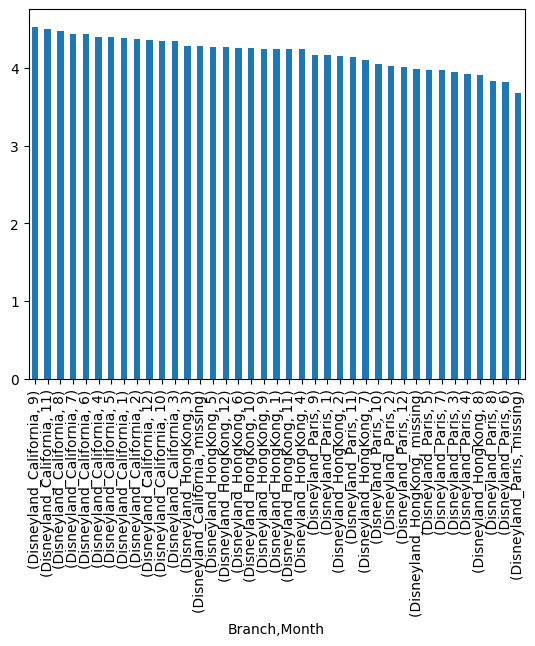

In [27]:
data.groupby(['Branch', 'Month'])['Rating'].agg('mean').sort_values(ascending=False).plot.bar()

In [28]:
data.groupby(['Branch', 'Year'])['Rating'].agg('mean').sort_values(ascending=False)

Branch                 Year   
Disneyland_California  2010       4.555556
                       2012       4.542857
                       2011       4.487933
                       2013       4.472915
                       2015       4.426675
                       2014       4.407491
                       2016       4.391071
                       2019       4.356164
                       2017       4.313469
Disneyland_HongKong    2017       4.306810
Disneyland_California  missing    4.279070
Disneyland_HongKong    2018       4.251721
                       2016       4.246612
Disneyland_California  2018       4.243171
Disneyland_HongKong    2015       4.229061
                       2019       4.197479
                       2013       4.193878
                       2014       4.165039
                       2011       4.120192
Disneyland_Paris       2017       4.086406
Disneyland_HongKong    2012       4.058824
Disneyland_Paris       2015       4.030499
                       2014       4.018983
                       2016       3.998976
Disneyland_HongKong    missing    3.985201
Disneyland_Paris       2012       3.967325
                       2018       3.949966
                       2013       3.855910
                       2011       3.852217
                       2010       3.850000
                       2019       3.753906
                       missing    3.682692
Disneyland_HongKong    2010       3.677419
Name: Rating, dtype: float64

<Axes: xlabel='Branch,Year'>

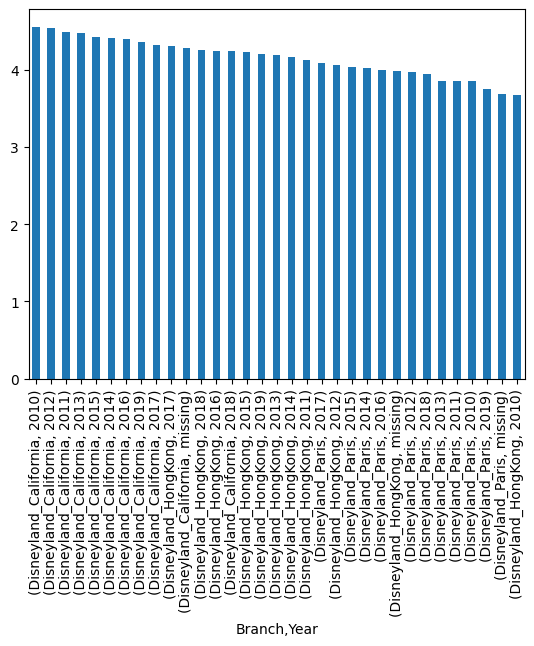

In [29]:
data.groupby(['Branch', 'Year'])['Rating'].agg('mean').sort_values(ascending=False).plot.bar()

In [30]:
data.groupby(['Branch', 'Year'])['Rating'].agg('mean').sort_values(ascending=False).reset_index()

,Branch,Year,Rating
0,Disneyland_California,2010,4.555556
1,Disneyland_California,2012,4.542857
2,Disneyland_California,2011,4.487933
3,Disneyland_California,2013,4.472915
4,Disneyland_California,2015,4.426675
5,Disneyland_California,2014,4.407491
6,Disneyland_California,2016,4.391071
7,Disneyland_California,2019,4.356164
8,Disneyland_California,2017,4.313469
9,Disneyland_HongKong,2017,4.306810


In [31]:
data.Review_Text.str.split(' ')

,Review_Text
0,"[If, you've, ever, been, to, Disneyland, anywh..."
1,"[Its, been, a, while, since, d, last, time, we..."
2,"[Thanks, God, it, wasn, , , t, too, hot, or, t..."
3,"[HK, Disneyland, is, a, great, compact, park.,..."
4,"[the, location, is, not, in, the, city,, took,..."
...,...
42651,"[i, went, to, disneyland, paris, in, july, 03,..."
42652,"[2, adults, and, 1, child, of, 11, visited, Di..."
42653,"[My, eleven, year, old, daughter, and, myself,..."
42654,"[This, hotel,, part, of, the, Disneyland, Pari..."


In [32]:
data.Review_Text.str.split(' ').str.len().describe()

,Review_Text
count,42644.000000
mean,132.199583
std,160.731924
min,4.000000
25%,46.000000
50%,82.000000
75%,158.000000
max,5600.000000


In [33]:
import nltk

In [34]:
data.Review_Text[0].strip()

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well."

# **Prétraitement des données**

In [35]:
# Import necessary libraries
import pandas as pd
import nltk
# download necessary nltk datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# Download the punkt_tab resource, which is required for some uses of the punkt tokenizer.
nltk.download('punkt_tab')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

def preprocess(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression des URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Suppression des mentions et hashtags
    text = re.sub(r'\@\w+|\#','', text)
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^A-Za-zÀ-ÖØ-öø-ÿ]+', ' ', text)
    # Tokenization
    words = word_tokenize(text)
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Racinisation
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [36]:
import numpy as np

In [37]:
data['cleaned_review'] = data['Review_Text'].apply(preprocess)

In [38]:
data['cleaned_review']

,cleaned_review
0,ever disneyland anywher find disneyland hong k...
1,sinc last time visit hk disneyland yet time st...
2,thank god hot humid visit park otherwis would ...
3,hk disneyland great compact park unfortun quit...
4,locat citi took around hour kowlon kid like di...
...,...
42651,went disneyland pari juli thought brilliant vi...
42652,adult child visit disneyland pari begin feb ab...
42653,eleven year old daughter went visit son london...
42654,hotel part disneyland pari complex wonder plac...


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the all_tokens
X = vectorizer.fit_transform(data['cleaned_review'])

In [40]:
data['sentiment'] = data['Rating'].apply(lambda x: 'positif' if x >= 4 else ('neutre' if x == 3 else 'négatif'))

In [41]:
from sklearn.preprocessing import LabelEncoder
# 2️⃣ Encodage des sentiments (One-Hot Encoding)
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

In [42]:
data.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,cleaned_review,sentiment,sentiment_encoded
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywher find disneyland hong k...,positif,2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,sinc last time visit hk disneyland yet time st...,positif,2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thank god hot humid visit park otherwis would ...,positif,2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortun quit...,positif,2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,locat citi took around hour kowlon kid like di...,positif,2
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,2019,4,disney world disneyland anaheim tokyo disneyla...,neutre,0
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong,2019,4,great place day go even know obvious went daug...,positif,2
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong,2019,3,think intro disney magic littl one almost attr...,neutre,0
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong,2019,4,feel let place disneyland train fantast get pa...,négatif,1
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong,2019,3,go talk disneyland whatev say less disneyland ...,positif,2


In [43]:
from sklearn.model_selection import train_test_split
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment_encoded'], test_size=0.2, random_state=42)

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  # Import SVC from sklearn.svm

# Initialisation des modèles
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle {name} : {accuracy:.2f}')

Précision du modèle Naive Bayes : 0.81


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Précision du modèle Logistic Regression : 0.85
Précision du modèle Random Forest : 0.80
Précision du modèle SVM : 0.85


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paramètres
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [46]:
# Tokenization
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned_review'])
sequences = tokenizer.texts_to_sequences(data['cleaned_review'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [47]:
# Padding
y = pd.get_dummies(data['sentiment_encoded']).values

In [48]:
# Séparation train/test
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# 5️⃣ Construction du modèle LSTM
model = Sequential([
    Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')  # 3 classes (positif, neutre, négatif)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [51]:
# Entraînement
history = model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_dl, y_test_dl), verbose=2)

Epoch 1/5
534/534 - 224s - 419ms/step - loss: 0.1165 - mae: 0.2313 - val_loss: 0.1153 - val_mae: 0.2315
Epoch 2/5
534/534 - 262s - 491ms/step - loss: 0.1149 - mae: 0.2287 - val_loss: 0.1153 - val_mae: 0.2306
Epoch 3/5
534/534 - 217s - 406ms/step - loss: 0.1137 - mae: 0.2273 - val_loss: 0.1151 - val_mae: 0.2249
Epoch 4/5
534/534 - 218s - 408ms/step - loss: 0.1129 - mae: 0.2262 - val_loss: 0.1153 - val_mae: 0.2269
Epoch 5/5
534/534 - 262s - 490ms/step - loss: 0.1120 - mae: 0.2243 - val_loss: 0.1158 - val_mae: 0.2186


In [52]:
# Évaluation
loss, accuracy = model.evaluate(X_test_dl, y_test_dl)
print(f'Précision du modèle LSTM : {accuracy:.2f}')

267/267 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.1145 - mae: 0.2172
Précision du modèle LSTM : 0.22



🔵 Entraînement du modèle CNN...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1067/1067 ━━━━━━━━━━━━━━━━━━━━ 67s 62ms/step - accuracy: 0.8026 - loss: 0.5664 - val_accuracy: 0.8368 - val_loss: 0.4184
Epoch 2/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.8540 - loss: 0.3616 - val_accuracy: 0.8422 - val_loss: 0.4107
Epoch 3/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - accuracy: 0.8978 - loss: 0.2741 - val_accuracy: 0.8422 - val_loss: 0.4523
Epoch 4/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - accuracy: 0.9400 - loss: 0.1824 - val_accuracy: 0.8295 - val_loss: 0.4876
Epoch 5/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9732 - loss: 0.1027 - val_accuracy: 0.8228 - val_loss: 0.5643
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8282 - loss: 0.5573
📊 Précision du modèle CNN : 0.82

🔵 Entraînement du modèle GRU...
Epoch 1/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 339s 313ms/step - accuracy: 0.7916 - loss: 0.6675 - val_accuracy: 0.7951 - val_loss: 0.6472
Epoch 2/5
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 378s 309ms/step - accuracy: 0.7938 - lo

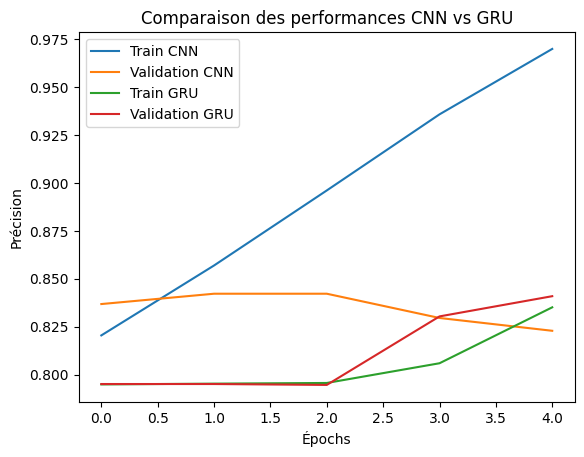

In [58]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, GRU, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
# 3️⃣ Prétraitement du texte
MAX_NB_WORDS = 5000  # Nombre max de mots dans le vocabulaire
MAX_SEQUENCE_LENGTH = 50  # Longueur max des séquences
EMBEDDING_DIM = 64  # Dimension des embeddings
# 5️⃣ Modèle CNN
def build_cnn():
    model = Sequential([
        Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(128, 5, activation='relu'),  # 128 filtres, taille du noyau = 5
        GlobalMaxPooling1D(),  # Réduction de la dimensionnalité
        Dense(3, activation='softmax')  # 3 classes (positif, neutre, négatif)
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 6️⃣ Modèle GRU
def build_gru():
    model = Sequential([
        Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        SpatialDropout1D(0.2),
        GRU(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(3, activation='softmax')  # 3 classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

y_train_dl = np.argmax(y_train_dl, axis=1)
y_test_dl = np.argmax(y_test_dl, axis=1)

# 7️⃣ Entraînement des modèles
models = {'CNN': build_cnn(), 'GRU': build_gru()}
results = {}

for name, model in models.items():
    print(f"\n🔵 Entraînement du modèle {name}...")
    history = model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=32, validation_data=(X_test_dl, y_test_dl))

    loss, accuracy = model.evaluate(X_test_dl, y_test_dl)
    results[name] = accuracy
    print(f'📊 Précision du modèle {name} : {accuracy:.2f}')

    # Courbes d'apprentissage
    plt.plot(history.history['accuracy'], label=f'Train {name}')
    plt.plot(history.history['val_accuracy'], label=f'Validation {name}')

# 8️⃣ Visualisation des résultats
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.title('Comparaison des performances CNN vs GRU')
plt.legend()